<a href="https://colab.research.google.com/github/DiogodosSantosS/DiogodosSantosS/blob/main/Project_ML_%26_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Packages

In [2]:
# For Data Processing
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For seaborn 
#sns.set_palette('YlGnBu_r')
#sns.set_palette('Spectral_r')
sns.set_palette('Set2')
#sns.set_palette('PuBu')
#sns.set_palette('pastel')

#Business Understanding

Create a model to predict the charges of a Health Insurance.

#Data Understanding

Dataset

In [3]:
df = pd.read_csv('/content/sample_data/insurance.csv', sep=',', encoding='utf-8')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


# Variables

*   age: age of primary beneficiary
*   sex: insurance contractor gender
*   bmi: body mass index
*   children: number of children covered by health insurance / number of dependents
*   smoker: smoker or not
*   region: the beneficiary's residential area in the US
*   charges: insurance cost (target)


In [5]:
#df.describe()
df.describe(include='all') # includes categorical columns as well

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1336,1337.000000,1336.00000,1338,1335,1338.000000
unique,NaN,3,NaN,NaN,2,5,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,674,NaN,NaN,1064,362,NaN
mean,39.207025,NaN,30.742083,1.09506,NaN,NaN,13270.422265
std,14.049960,NaN,6.679812,1.20639,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.00000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.315000,0.00000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.00000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.700000,2.00000,NaN,NaN,16639.912515


We immediatly see that we have a strange value for the variable "bmi", with a max value of 130. Next, we find out if this is an outlier.

In [6]:
# Count the number of lines where 'bmi' is above 60
len(df[df["bmi"]>60])

1

Once we just have one line that meets the previous condition, we consider it an outlier and delete the line from the dataset.

In [7]:
# Delete the lines where 'bmi' is greater than 60. For this dataset we have just one
df = df.drop(df[df['bmi'] > 60].index)

In [8]:
# Re-check of variables description
df.describe()

,age,bmi,children,charges
count,1337.000000,1336.000000,1335.000000,1337.000000
mean,39.199701,30.667564,1.095880,13274.276971
std,14.052662,6.101082,1.206469,12113.721393
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.308750,0.000000,4738.268200
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# See the types of data for each variable as well as the number
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1335 non-null   float64
 4   smoker    1337 non-null   object 
 5   region    1334 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.6+ KB


In [10]:
# Count the number of null values for each variable
df.isnull().sum()

age         0
sex         2
bmi         1
children    2
smoker      0
region      3
charges     0
dtype: int64

In [11]:
# Creation of bins for the variable age. The new column representing these bins is "age_cat"
df.loc[ df['age']<=20, 'age_cat'] = "<=20"
df.loc[ (df['age']>20) & (df['age']<=30), 'age_cat'] = "21-30"
df.loc[ (df['age']>30) & (df['age']<=40), 'age_cat'] = "31-40"
df.loc[ (df['age']>40) & (df['age']<=50), 'age_cat'] = "41-50"
df.loc[ (df['age']>50) & (df['age']<=60), 'age_cat'] = "51-60"
df.loc[ df['age']>60, 'age_cat'] = ">60"
df

# Creation of bins for the variable bmi. The new column representing these bins is "bmi_cat"
df.loc[ df['bmi']<=20, 'bmi_cat'] = "<=20"
df.loc[ (df['bmi']>20) & (df['bmi']<=30), 'bmi_cat'] = "21-30"
df.loc[ (df['bmi']>30) & (df['bmi']<=40), 'bmi_cat'] = "31-40"
df.loc[ (df['bmi']>40) & (df['bmi']<=50), 'bmi_cat'] = "41-50"
df.loc[ (df['bmi']>50) & (df['bmi']<=60), 'bmi_cat'] = "51-60"
df.loc[ df['bmi']>60, 'bmi_cat'] = ">60"
df

,age,sex,bmi,children,smoker,region,charges,age_cat,bmi_cat
0,19,female,27.900,0.0,yes,southwest,16884.92400,<=20,21-30
1,18,male,33.770,1.0,no,southeast,1725.55230,<=20,31-40
2,28,male,33.000,3.0,no,southeast,4449.46200,21-30,31-40
3,33,male,22.705,0.0,no,northwest,21984.47061,31-40,21-30
4,32,male,28.880,0.0,no,northwest,3866.85520,31-40,21-30
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830,41-50,31-40
1334,18,female,31.920,0.0,no,northeast,2205.98080,<=20,31-40
1335,18,female,36.850,0.0,no,southeast,1629.83350,<=20,31-40
1336,21,female,25.800,0.0,no,southwest,2007.94500,21-30,21-30


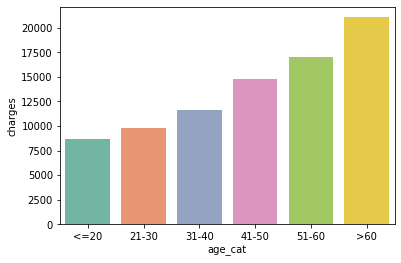

In [12]:
# Average charges per age category
sns.barplot(x='age_cat', y='charges', ci=None, data=df)

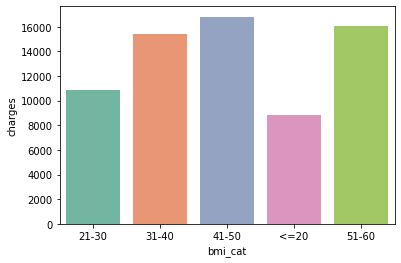

In [13]:
# Average charges per bmi category
sns.barplot(x='bmi_cat', y='charges', ci=None, data=df)

Having the mean of charges for each age category (result of bining) helps us understand the tendency of the amont paid for an health insurance as age increases.

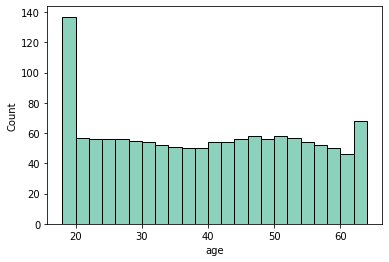

In [14]:
#Plot of age distribution in the dataset
sns.histplot(data=df, x="age", binwidth=2)

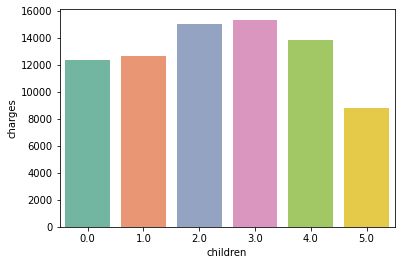

In [15]:
# Plot of average charges per number of children
sns.barplot(x='children', y='charges', ci=None, data=df)

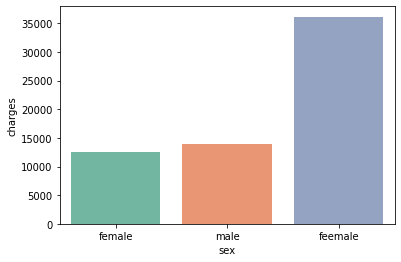

In [16]:
# Plot of average charges per sex
sns.barplot(x='sex', y='charges', ci=None, data=df)

We realize we have an error with the typing of female, so we need to correct this.

In [17]:
# Replace of value 'feemale' with the value 'female'
df['sex'] = df['sex'].replace(['feemale'],'female')

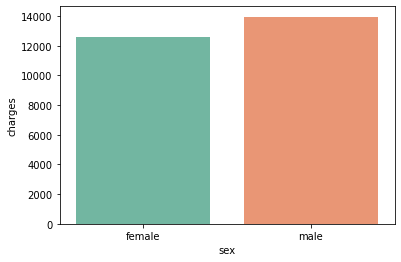

In [18]:
# Plot again the  average charges per sex, after correcting sex typing error.
sns.barplot(x='sex', y='charges', ci=None, data=df)

In [19]:
# Count number of people of each sex
df['sex'].value_counts()

male      673
female    662
Name: sex, dtype: int64

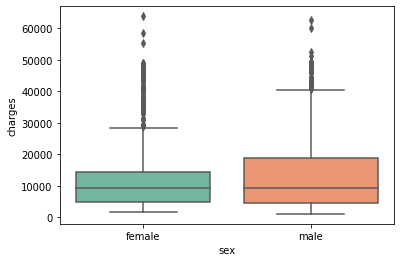

In [20]:
# Boxplot for charges per sex
sns.boxplot(x='sex', y='charges', data=df)

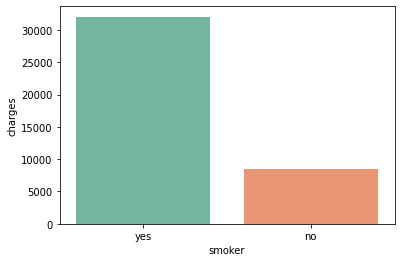

In [21]:
# Plot of average charges for smokers and non-smokers
sns.barplot(x='smoker', y='charges', ci=None, data=df)

In [22]:
# Count of smokers and non-smokers
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [23]:
# Count number of people living in each area
df['region'].value_counts()

southeast    362
southwest    324
northeast    324
northwest    323
Southeast      1
Name: region, dtype: int64

In [24]:
# Transform Southeast into southeast
df['region'] = df['region'].replace(['Southeast'], 'southeast')

In [25]:
# Re-check the count of people living in each area
df['region'].value_counts()

southeast    363
southwest    324
northeast    324
northwest    323
Name: region, dtype: int64

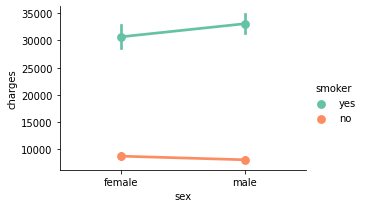

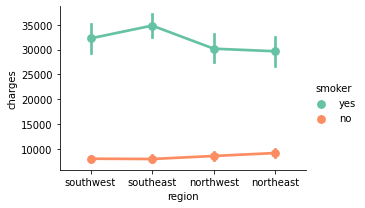

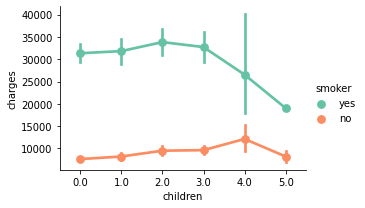

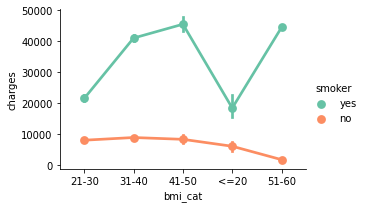

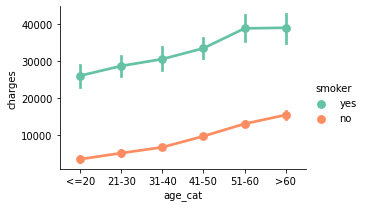

In [26]:
# Point estimate and confidence interval
sns.catplot(x='sex', y='charges', hue='smoker', data=df, kind='point', height=3, aspect=1.5)
sns.catplot(x='region', y='charges', hue='smoker', data=df, kind='point', height=3, aspect=1.5)
sns.catplot(x='children', y='charges', hue='smoker', data=df, kind='point', height=3, aspect=1.5)
sns.catplot(x='bmi_cat', y='charges', hue='smoker', data=df, kind="point", height=3, aspect=1.5)
sns.catplot(x='age_cat', y='charges', hue='smoker', data=df, kind='point', height=3, aspect=1.5)

# Data Preparation

"Under the health care law, insurance companies can no longer discriminate based on sex. This means women can't be charged more simply because they are women, and being a woman is no longer a preexisting condition."
https://nwlc.org/issue/discrimination-in-health-care/

For this reason, we disregard 'sex' column.

In [27]:
# Delete 'sex' column
df=df.drop(['sex'], axis=1)

In [28]:
# Delete 'age_cat' column
df=df.drop(['age_cat'], axis=1)

In [29]:
# Delete 'bmi_cat' column
df=df.drop(['bmi_cat'], axis=1)

In [30]:
# Count number of missing values
df.isnull().sum()

age         0
bmi         1
children    2
smoker      0
region      3
charges     0
dtype: int64

In [31]:
# Count rows that have missing values
sum([True for idx,row in df.iterrows() if any(row.isnull())])

6

We have 6 lines with missing values. Out of the 1337 lines, they represent less than 0.5%. For this reason, we will drop the lines with missing values.

In [32]:
# Drop missing values from the columns which were identified has having missing values.
df=df.dropna(subset=['region', 'children', 'bmi'])

In [33]:
# One-hot encode variables

# Get Dummies
smoker = pd.get_dummies(df['smoker'], prefix='smoker', drop_first=True)
# Join datasets
df = pd.concat([df,smoker], axis=1)
# Drop original column
df = df.drop(['smoker'], axis=1)

# Get Dummies
region = pd.get_dummies(df['region'], prefix='region', drop_first=True)
# Join datasets
df = pd.concat([df,region], axis=1)
# Drop original column
df = df.drop(['region'], axis=1)

In [34]:
# Check result of one-hot encode variables
df.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0.0,16884.92400,1,0,0,1
1,18,33.770,1.0,1725.55230,0,0,1,0
2,28,33.000,3.0,4449.46200,0,0,1,0
3,33,22.705,0.0,21984.47061,0,1,0,0
4,32,28.880,0.0,3866.85520,0,1,0,0


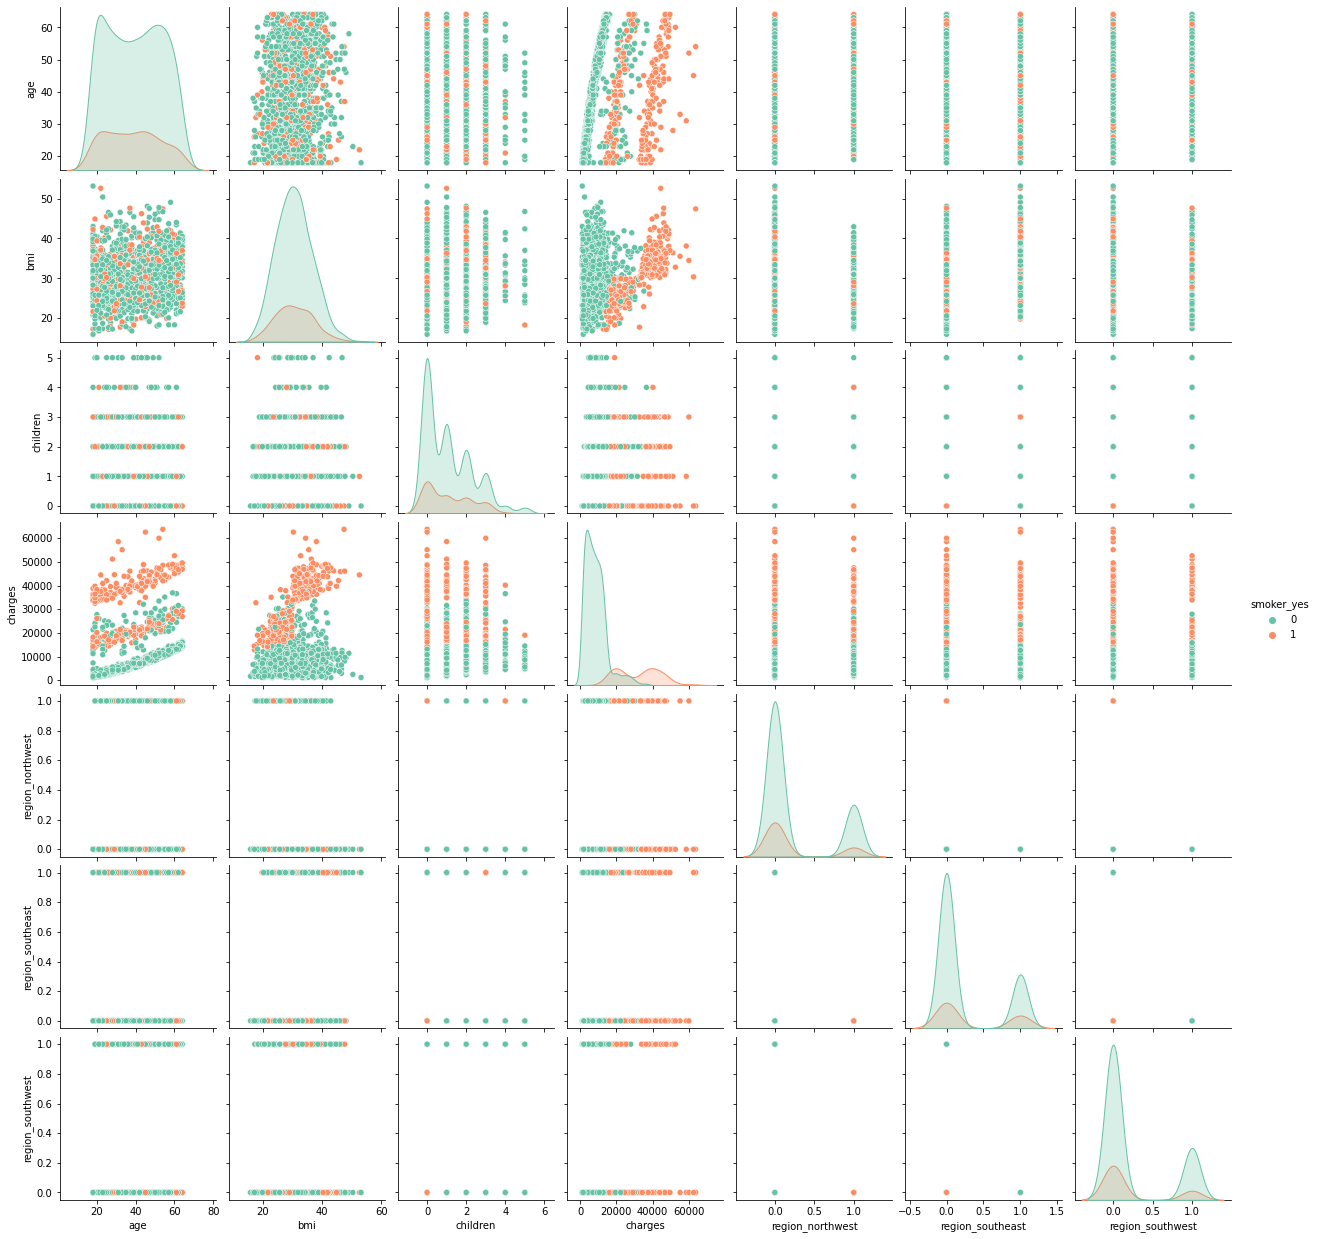

In [35]:
# Plot pairwise relationships in the dataset after one-hot encoding.
# We have seen that being a smoker has a great influence in the target "charges", so we use this variable has 'hue'.
sns.pairplot(df, hue='smoker_yes')

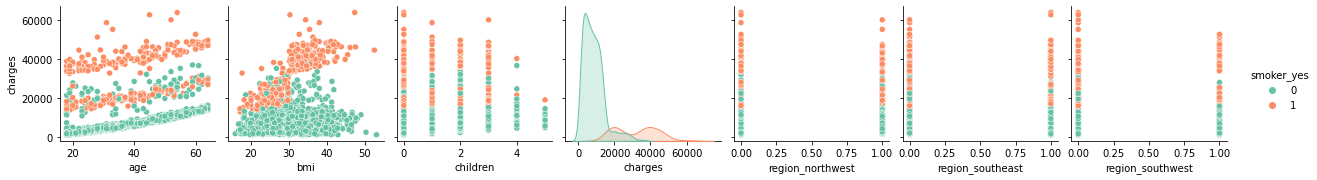

In [36]:
# Focusing on the target - 'charges'
sns.pairplot(df, hue='smoker_yes', y_vars="charges")

In [37]:
# Correlation between each variable
df.corr()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109838,0.043865,0.298698,-0.023953,0.000931,-0.011962,0.008920
bmi,0.109838,1.000000,0.012948,0.199015,0.003290,-0.137578,0.269932,-0.005618
children,0.043865,0.012948,1.000000,0.068076,0.006209,0.026447,-0.023385,0.022090
charges,0.298698,0.199015,0.068076,1.000000,0.789421,-0.037709,0.072869,-0.043957
smoker_yes,-0.023953,0.003290,0.006209,0.789421,1.000000,-0.036812,0.067895,-0.036812
region_northwest,0.000931,-0.137578,0.026447,-0.037709,-0.036812,1.000000,-0.346646,-0.320437
region_southeast,-0.011962,0.269932,-0.023385,0.072869,0.067895,-0.346646,1.000000,-0.346646
region_southwest,0.008920,-0.005618,0.022090,-0.043957,-0.036812,-0.320437,-0.346646,1.000000


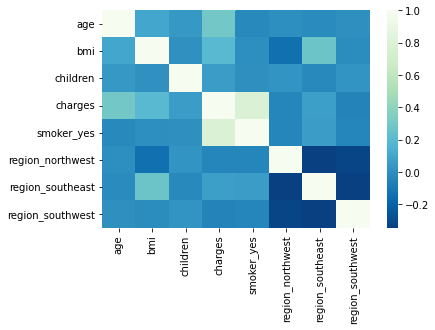

In [38]:
# Correlation heatmap
sns.heatmap(df.corr(), cmap='GnBu_r')

# Modeling

# Data preparation

In [39]:
# Separate in X (variables) and y (target) for modeling
X = df.drop(['charges'], axis=1)
y = df['charges']

In [40]:
# Split dataset in train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

We don't have NAs, so we don't need to impute values.

### Scale with Standard Scaler
Models tend to like Normal-like variables
Need to calculate standardization values only in the train dataset and use it to tranform train and test datasets, otherwise we would add leakage.


In [41]:
# Scale Age and Fare with Standard Scaler
# Models tend to like Normal-like variables

# Need to calculate standardization values only in the train dataset and use it to tranform train and test datasets, 
# otherwise we would add leakage.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.loc[:,['age', 'bmi']] = scaler.fit_transform(X_train[['age', 'bmi']])
X_test.loc[:,['age', 'bmi']] = scaler.fit_transform(X_test[['age', 'bmi']])

## Algorithms

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Fit models to training dataset
regr_lr = LinearRegression()
regr_lr.fit(X_train, y_train)

regr_kn = KNeighborsRegressor()
regr_kn.fit(X_train, y_train)

regr_dt = DecisionTreeRegressor(random_state=0)
regr_dt.fit(X_train, y_train)

regr_rf = RandomForestRegressor(random_state=0)
regr_rf.fit(X_train, y_train)

regr_xgb = xgb.XGBRegressor(random_state=0)
regr_xgb.fit(X_train, y_train);

[15:00:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Evaluation

### In training sample

In [43]:
y_pred_train_lr = regr_lr.predict(X_train)
y_pred_train_kn = regr_kn.predict(X_train)
y_pred_train_dt = regr_dt.predict(X_train)
y_pred_train_rf = regr_rf.predict(X_train)
y_pred_train_xgb = regr_xgb.predict(X_train)

Metrics

In [44]:
#Mean squared error - do not present because it is of hard interpretation
#from sklearn.metrics import mean_squared_error
#mse_train_lr=mean_squared_error(y_train, y_pred_train_lr)
#mse_train_kn=mean_squared_error(y_train, y_pred_train_kn)
#mse_train_dt=mean_squared_error(y_train, y_pred_train_dt)
#mse_train_rf=mean_squared_error(y_train, y_pred_train_rf)
#mse_train_xgb=mean_squared_error(y_train, y_pred_train_xgb)

#Root mean squared error
from sklearn.metrics import mean_squared_error
rmse_train_lr=mean_squared_error(y_train, y_pred_train_lr, squared=False)
rmse_train_kn=mean_squared_error(y_train, y_pred_train_kn, squared=False)
rmse_train_dt=mean_squared_error(y_train, y_pred_train_dt, squared=False)
rmse_train_rf=mean_squared_error(y_train, y_pred_train_rf, squared=False)
rmse_train_xgb=mean_squared_error(y_train, y_pred_train_xgb, squared=False)

#Mean absolute error
from sklearn.metrics import mean_absolute_error
mae_train_lr=mean_absolute_error(y_train, y_pred_train_lr)
mae_train_kn=mean_absolute_error(y_train, y_pred_train_kn)
mae_train_dt=mean_absolute_error(y_train, y_pred_train_dt)
mae_train_rf=mean_absolute_error(y_train, y_pred_train_rf)
mae_train_xgb=mean_absolute_error(y_train, y_pred_train_xgb)

#Mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
mape_train_lr=mean_absolute_percentage_error(y_train, y_pred_train_lr)
mape_train_kn=mean_absolute_percentage_error(y_train, y_pred_train_kn)
mape_train_dt=mean_absolute_percentage_error(y_train, y_pred_train_dt)
mape_train_rf=mean_absolute_percentage_error(y_train, y_pred_train_rf)
mape_train_xgb=mean_absolute_percentage_error(y_train, y_pred_train_xgb)

#Median absolute error
from sklearn.metrics import median_absolute_error
medae_train_lr=median_absolute_error(y_train, y_pred_train_lr)
medae_train_kn=median_absolute_error(y_train, y_pred_train_kn)
medae_train_dt=median_absolute_error(y_train, y_pred_train_dt)
medae_train_rf=median_absolute_error(y_train, y_pred_train_rf)
medae_train_xgb=median_absolute_error(y_train, y_pred_train_xgb)

#R² score
from sklearn.metrics import r2_score
r2_train_lr=r2_score(y_train, y_pred_train_lr)
r2_train_kn=r2_score(y_train, y_pred_train_kn)
r2_train_dt=r2_score(y_train, y_pred_train_dt)
r2_train_rf=r2_score(y_train, y_pred_train_rf)
r2_train_xgb=r2_score(y_train, y_pred_train_xgb)

#Generate a comparison table
metrics_train = pd.DataFrame({
    'RMSE': [rmse_train_lr, rmse_train_kn, rmse_train_dt, rmse_train_rf, rmse_train_xgb],
    'MAE': [mae_train_lr, mae_train_kn, mae_train_dt, mae_train_rf, mae_train_xgb],
    'MAPE': [mape_train_lr, mape_train_kn, mape_train_dt, mape_train_rf, mape_train_xgb],
    'MEDAE': [medae_train_lr, medae_train_kn, medae_train_dt, medae_train_rf, medae_train_xgb],
    'R2': [r2_train_lr, r2_train_kn, r2_train_dt, r2_train_rf, r2_train_xgb],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost"])

metrics_train

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,6035.250747,4131.282080,0.426710,2397.135647,0.761026
KNeighborsRegressor,5159.401178,2945.175195,0.304573,991.609212,0.825354
DecisionTreeRegressor,415.077305,18.449600,0.004602,0.000000,0.998870
RandomForestRegressor,1848.779239,1025.579658,0.128900,403.642083,0.977575
XGBoost,3832.907413,2077.285989,0.251932,1222.980336,0.903613


### In test sample

In [45]:
y_pred_lr = regr_lr.predict(X_test)
y_pred_kn = regr_kn.predict(X_test)
y_pred_dt = regr_dt.predict(X_test)
y_pred_rf = regr_rf.predict(X_test)
y_pred_xgb = regr_xgb.predict(X_test)

In [46]:
#Mean squared error
#mse_lr=mean_squared_error(y_test, y_pred_lr)
#mse_kn=mean_squared_error(y_test, y_pred_kn)
#mse_dt=mean_squared_error(y_test, y_pred_dt)
#mse_rf=mean_squared_error(y_test, y_pred_rf)
#mse_xgb=mean_squared_error(y_test, y_pred_xgb)

#Root mean squared error
rmse_lr=mean_squared_error(y_test, y_pred_lr, squared=False)
rmse_kn=mean_squared_error(y_test, y_pred_kn, squared=False)
rmse_dt=mean_squared_error(y_test, y_pred_dt, squared=False)
rmse_rf=mean_squared_error(y_test, y_pred_rf, squared=False)
rmse_xgb=mean_squared_error(y_test, y_pred_xgb, squared=False)

#Mean absolute error
mae_lr=mean_absolute_error(y_test, y_pred_lr)
mae_kn=mean_absolute_error(y_test, y_pred_kn)
mae_dt=mean_absolute_error(y_test, y_pred_dt)
mae_rf=mean_absolute_error(y_test, y_pred_rf)
mae_xgb=mean_absolute_error(y_test, y_pred_xgb)

#Mean absolute percentage error
mape_lr=mean_absolute_percentage_error(y_test, y_pred_lr)
mape_kn=mean_absolute_percentage_error(y_test, y_pred_kn)
mape_dt=mean_absolute_percentage_error(y_test, y_pred_dt)
mape_rf=mean_absolute_percentage_error(y_test, y_pred_rf)
mape_xgb=mean_absolute_percentage_error(y_test, y_pred_xgb)

#Median absolute error
#The median_absolute_error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.
medae_lr=median_absolute_error(y_test, y_pred_lr)
medae_kn=median_absolute_error(y_test, y_pred_kn)
medae_dt=median_absolute_error(y_test, y_pred_dt)
medae_rf=median_absolute_error(y_test, y_pred_rf)
medae_xgb=median_absolute_error(y_test, y_pred_xgb)


#R² score, the coefficient of determination
r2_lr=r2_score(y_test, y_pred_lr)
r2_kn=r2_score(y_test, y_pred_kn)
r2_dt=r2_score(y_test, y_pred_dt)
r2_rf=r2_score(y_test, y_pred_rf)
r2_xgb=r2_score(y_test, y_pred_xgb)

#Generate a comparison table
metrics_test = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_dt, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_kn, mae_dt, mae_rf, mae_xgb],
    'MAPE': [mape_lr, mape_kn, mape_dt, mape_rf, mape_xgb],
    'MEDAE': [medae_lr, medae_kn, medae_dt, medae_rf, medae_xgb],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost"])

metrics_test

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,5916.744275,4067.224322,0.388644,2381.413292,0.718494
KNeighborsRegressor,5601.397689,3408.791485,0.438078,1488.441570,0.747701
DecisionTreeRegressor,6455.866171,3156.036538,0.362165,582.109200,0.664856
RandomForestRegressor,4819.742036,2773.275322,0.354548,1171.739859,0.813203
XGBoost,4532.824614,2535.928746,0.281181,1492.104839,0.834781


Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

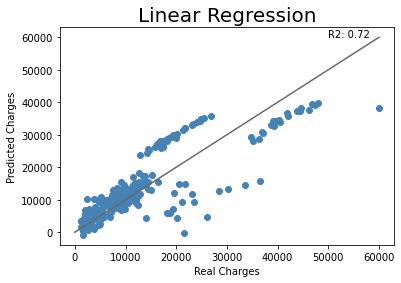

In [47]:
plt.scatter(y_test, y_pred_lr, c='steelblue')
plt.plot([0,60000], [0,60000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_lr,2)), [50000, 60000])
plt.title('Linear Regression', fontsize=20)
plt.show()

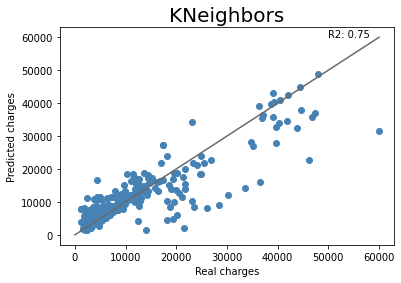

In [48]:
plt.scatter(y_test, y_pred_kn, c="steelblue")
plt.plot( [0,60000],[0,60000], c='dimgrey' )
plt.xlabel('Real charges')
plt.ylabel('Predicted charges')
plt.title('KNeighbors', fontsize=20)
plt.annotate('R2: ' + str(round(r2_kn,2)), [50000, 60000])
plt.show()

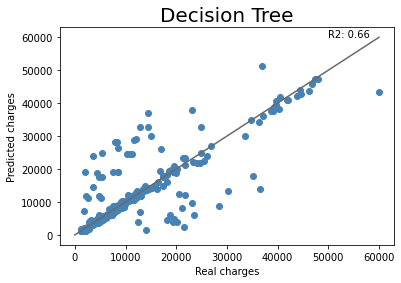

In [49]:
plt.scatter(y_test, y_pred_dt, c="steelblue")
plt.plot( [0,60000],[0,60000], c='dimgrey' )
plt.xlabel('Real charges')
plt.ylabel('Predicted charges')
plt.title('Decision Tree', fontsize=20)
plt.annotate('R2: ' + str(round(r2_dt,2)), [50000, 60000])
plt.show()

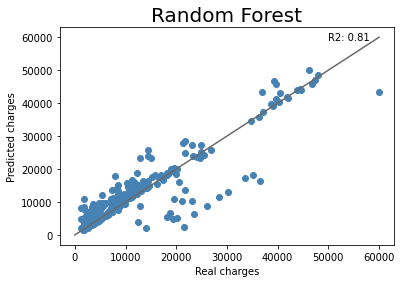

In [50]:
plt.scatter(y_test, y_pred_rf, c="steelblue")
plt.plot( [0,60000],[0,60000], c='dimgrey' )
plt.xlabel('Real charges')
plt.ylabel('Predicted charges')
plt.title('Random Forest', fontsize=20)
plt.annotate('R2: ' + str(round(r2_rf,2)), [50000, 59000])
plt.show()

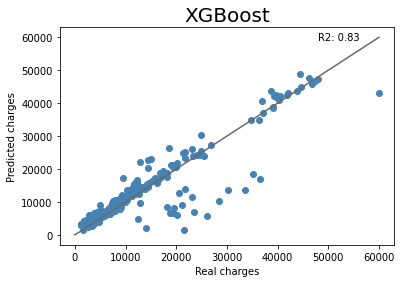

In [51]:
plt.scatter(y_test, y_pred_xgb, c="steelblue")
plt.plot( [0,60000],[0,60000], c='dimgrey' )
plt.xlabel('Real charges')
plt.ylabel('Predicted charges')
plt.title('XGBoost', fontsize=20)
plt.annotate('R2: ' + str(round(r2_xgb,2)), [48000, 59000])
plt.show()

### Hyper-parameter Tuning

In [52]:
#Code to get parameters
#LinearRegression().get_params().keys()

In [53]:
# Code to search best parameters for one defined algorithm
#from sklearn.model_selection import GridSearchCV
#param_grid = {'bootstrap': [True], 'max_depth': [2, 3, 5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 20, 25, 30]}
#rfr = RandomForestRegressor(random_state = 1)
#g_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
#g_search.fit(X_train, y_train);
#print(g_search.best_params_)

In [54]:
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Initialze the estimators
#regr_lr = LinearRegression()
#regr_kn = KNeighborsRegressor()
#regr_dt = DecisionTreeRegressor(random_state=0)
#regr_rf = RandomForestRegressor(random_state=0)
#regr_xgb = xgb.XGBRegressor(random_state=0)

# Initiaze the hyperparameters for each dictionary
param_lr = {}
param_lr['regressor'] = [regr_lr]

param_rf = {}
param_rf['regressor__n_estimators'] = [5, 10, 20, 50, 100, 200]
param_rf['regressor__max_depth'] = [1, 3, 5, 10, 20]
param_rf['regressor'] = [regr_rf]

param_kn = {}
param_kn['regressor__n_neighbors'] = [2,5,10,25,50]
param_kn['regressor__weights'] = ['uniform', 'distance']
param_kn['regressor'] = [regr_kn]

param_dt = {}
param_dt['regressor__max_depth'] = [5,10,25,None]
param_dt['regressor__min_samples_split'] = [2,5,10]
param_dt['regressor'] = [regr_dt]

param_xgb = {}
param_xgb['regressor__max_depth'] = [3,6,10,15]
param_xgb['regressor__eta'] = [0.1, 0.3]
param_xgb['regressor__subsample']=[0.5, 1]
param_xgb['regressor__colsample_bytree'] = [0.7, 0.9, 1]
param_xgb['regressor__num_parallel_tree'] = [1, 5, 10]
param_xgb['regressor'] = [regr_xgb]

pipeline = Pipeline([('regressor', DummyRegressor)])
params = [param_lr, param_rf, param_kn, param_dt, param_xgb]

# Train the grid search model
gs = GridSearchCV(pipeline,
                  params, 
                  cv = 5, 
                  n_jobs = 1, 
                  verbose = 0, 
                  return_train_score=True, 
                  scoring='neg_root_mean_squared_error')

best_model = gs.fit(X_train, y_train)

# See which model was the best
best_model.best_estimator_.get_params()['regressor']

[15:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

XGBRegressor(colsample_bytree=0.9, eta=0.1, num_parallel_tree=5, subsample=0.5)

In [55]:
best_model.score(X_train, y_train)

-3793.700163928381

In [56]:
# Check the best model performance 
y_pred = best_model.predict(X_test)
#mse_bestmodel=mean_squared_error(y_test, y_pred)
rmse_bestmodel=mean_squared_error(y_test, y_pred, squared=False)
mae_bestmodel=mean_absolute_error(y_test, y_pred)
mape_bestmodel=mean_absolute_percentage_error(y_test, y_pred)
medae_bestmodel=median_absolute_error(y_test, y_pred)
r2_bestmodel=r2_score(y_test, y_pred)

#Generate a comparison table
metrics_bestmodel = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_dt, rmse_rf, rmse_xgb, rmse_bestmodel],
    'MAE': [mae_lr, mae_kn, mae_dt, mae_rf, mae_xgb, mae_bestmodel],
    'MAPE': [mape_lr, mape_kn, mape_dt, mape_rf, mape_xgb, mape_bestmodel],
    'MEDAE': [medae_lr, medae_kn, medae_dt, medae_rf, medae_xgb, medae_bestmodel],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb, r2_bestmodel],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost", "Best Model"])

metrics_bestmodel

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,5916.744275,4067.224322,0.388644,2381.413292,0.718494
KNeighborsRegressor,5601.397689,3408.791485,0.438078,1488.441570,0.747701
DecisionTreeRegressor,6455.866171,3156.036538,0.362165,582.109200,0.664856
RandomForestRegressor,4819.742036,2773.275322,0.354548,1171.739859,0.813203
XGBoost,4532.824614,2535.928746,0.281181,1492.104839,0.834781
Best Model,4392.219165,2433.165162,0.262580,1416.912422,0.844872


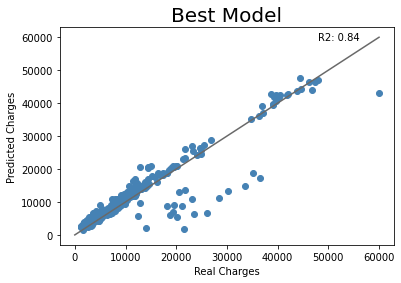

In [57]:
# Plot best model - in test sample
plt.scatter(y_test, y_pred, c='steelblue')
plt.plot([0,60000], [0,60000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.title('Best Model', fontsize=20)
plt.annotate('R2: ' + str(round(r2_bestmodel,2)), [48000, 59000])
plt.show()

#Plot best model - in train sample
#y_pred_train = best_model.predict(X_train)
#plt.scatter(y_train,y_pred_train, c="steelblue")
#plt.plot( [0,50000],[0,50000], c='dimgrey' )
#plt.xlabel('Real charges')
#plt.ylabel('Predicted charges')
#plt.title('Best Model -train', fontsize=20)
#plt.show()

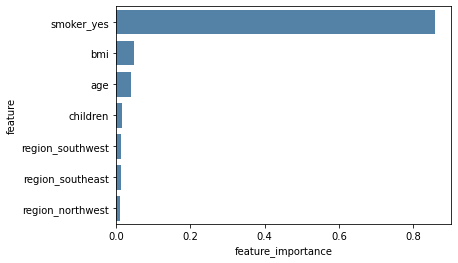

In [58]:
# See which features are most important for the best model, in this case was a XGBoost model
df_feat = pd.DataFrame({'feature': X_test.columns,
                        'feature_importance': best_model.best_estimator_.named_steps['regressor'].feature_importances_}) \
                        .sort_values('feature_importance', ascending=False) \
                        .reset_index(drop=True)

sns_feats = sns.barplot(x='feature_importance', y='feature', data=df_feat, orient='h', color='steelblue')

### Understanding Linear Regression

In [59]:
regr_lr.coef_

array([ 3523.12935473,  2010.65241328,   438.99159279, 24348.50152811,
        -564.47938777,  -997.36249255, -1032.0396922 ])

In [60]:
for indx, col_name in enumerate(X_train.columns):
  print('Coefficient of {} is {}'.format(col_name, regr_lr.coef_[indx]))

Coefficient of age is 3523.1293547271775
Coefficient of bmi is 2010.6524132833279
Coefficient of children is 438.99159279165906
Coefficient of smoker_yes is 24348.501528109733
Coefficient of region_northwest is -564.4793877680722
Coefficient of region_southeast is -997.362492547979
Coefficient of region_southwest is -1032.0396921974523


In [61]:
intercept=regr_lr.intercept_
print('The intercept of our model is {}'.format(intercept))

The intercept of our model is 8540.92097184161


In [62]:
regr_lr.score(X_train, y_train)

0.7610256006010339

In [63]:
regr_lr.score(X_test, y_test)

0.7184940075535982

### Deep Learning

In [64]:
# Installation if needed
!pip install shap

     |████████████████████████████████| 564 kB 8.1 MB/s 


In [65]:
import tensorflow.compat.v1.keras.backend as K # To solve a current problem with SHAP library
import tensorflow as tf
tf.compat.v1.disable_eager_execution() # To solve a current problem with SHAP library

In [66]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [67]:
#Create validation sample
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [68]:
X_train.shape

(851, 7)

In [69]:
X_val.shape

(213, 7)

In [70]:
import tensorflow as tf
# Import Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# Add an input layer
model.add(Dense(12, activation='relu', input_shape=(7,)))

# Add one hidden layer
model.add(Dense(10, activation='relu'))

# Add one hidden layer 
model.add(Dense(10, activation='relu'))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add one hidden layer 
model.add(Dense(6, activation='relu'))

# Add one hidden layer 
model.add(Dense(3, activation='relu'))

# Add an output layer 
model.add(Dense(1))

In [71]:
# Check model output shape
model.output_shape

(None, 1)

In [72]:
# Check model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                96        
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 8)                 88        
                                                                 
 dense_4 (Dense)             (None, 6)                 54        
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
 dense_6 (Dense)             (None, 1)                 4

In [73]:
# Check model config
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 7),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 7),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 12,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'c

In [74]:
# List all weight tensors 
model.get_weights()

[array([[-0.12755254, -0.13475782, -0.21053123,  0.28734457,  0.5240932 ,
          0.5402705 , -0.5261615 , -0.50232196, -0.5299866 , -0.16000226,
          0.42823696, -0.5525811 ],
        [ 0.36485815, -0.527846  , -0.15081286, -0.38206327,  0.42184907,
          0.52989095, -0.34969914, -0.148213  , -0.5351432 ,  0.43727696,
          0.18577659, -0.11000508],
        [-0.19618577,  0.25597876, -0.05174911,  0.05585414,  0.11965334,
          0.32560772,  0.06136817,  0.54013664,  0.53075296, -0.02753657,
          0.37456805, -0.18109682],
        [ 0.08809805,  0.46742457, -0.12792137, -0.26234183,  0.28673083,
          0.3527512 , -0.34061262,  0.4434207 , -0.49061936, -0.2407431 ,
         -0.225629  , -0.14134869],
        [-0.00366288, -0.00224042,  0.49923998, -0.21291593,  0.10233861,
          0.39691198,  0.41591364, -0.45671698, -0.52643895,  0.05743414,
          0.16566586,  0.40384996],
        [ 0.30444038, -0.55667603, -0.11584055,  0.23987252, -0.41909254,
      

In [75]:
# Config the model with the loss, optimizer and metric
model.compile(loss="mse",
             optimizer='adam',
             metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [76]:
# Train the model
callback=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(X_train, y_train, epochs=12, batch_size=5, verbose=1, validation_data=(X_val,y_val))

Train on 851 samples, validate on 213 samples
Epoch 1/12
851/851 [==============================] - 1s 748us/sample - loss: 339947273.8434 - root_mean_squared_error: 18437.6621 - val_loss: 301424563.5446 - val_root_mean_squared_error: 17361.5840
Epoch 2/12
295/851 [=========>....................] - ETA: 0s - loss: 314921008.2034 - root_mean_squared_error: 17746.0117

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


851/851 [==============================] - 0s 393us/sample - loss: 319286769.5893 - root_mean_squared_error: 17868.5977 - val_loss: 227409149.7934 - val_root_mean_squared_error: 15080.0918
Epoch 3/12
851/851 [==============================] - 0s 349us/sample - loss: 150772319.6613 - root_mean_squared_error: 12278.9365 - val_loss: 108779254.1690 - val_root_mean_squared_error: 10429.7285
Epoch 4/12
851/851 [==============================] - 0s 374us/sample - loss: 107119393.7650 - root_mean_squared_error: 10349.8496 - val_loss: 97675939.3920 - val_root_mean_squared_error: 9883.1133
Epoch 5/12
851/851 [==============================] - 0s 367us/sample - loss: 93563205.7791 - root_mean_squared_error: 9672.8086 - val_loss: 86286458.9906 - val_root_mean_squared_error: 9289.0508
Epoch 6/12
851/851 [==============================] - 0s 535us/sample - loss: 79159610.6739 - root_mean_squared_error: 8897.1689 - val_loss: 73224066.3239 - val_root_mean_squared_error: 8557.1064
Epoch 7/12
851/851 [=

Text(0, 0.5, 'Validation Loss')

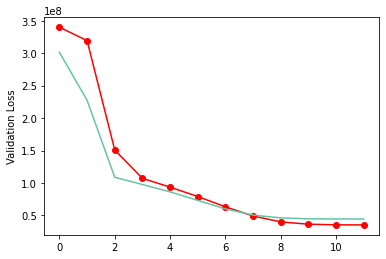

In [77]:
ax = plt.gca()
ax.plot(history.epoch, history.history["loss"], "ro-")
ax.plot(history.epoch, history.history["val_loss"])
ax.set_ylabel('Validation Loss')

In [78]:
#Using early stopping
#callback=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#history2 = model.fit(X_train, y_train, epochs=300, batch_size=5, verbose=1, callbacks=[callback])

In [79]:
#ax = plt.gca()
#ax.plot(history2.epoch, history2.history["loss"], "ro-")
#ax.set_ylabel('Validation Loss')

In [80]:
# Predict for the test set
y_pred_DL = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [81]:
#mse_bestmodel=mean_squared_error(y_test, y_pred)
rmse_DL=mean_squared_error(y_test, y_pred_DL, squared=False)
mae_DL=mean_absolute_error(y_test, y_pred_DL)
mape_DL=mean_absolute_percentage_error(y_test, y_pred_DL)
medae_DL=median_absolute_error(y_test, y_pred_DL)
r2_DL=r2_score(y_test, y_pred_DL)

#Generate a comparison table
metrics_bestmodel = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_dt, rmse_rf, rmse_xgb, rmse_bestmodel, rmse_DL ],
    'MAE': [mae_lr, mae_kn, mae_dt, mae_rf, mae_xgb, mae_bestmodel, mae_DL],
    'MAPE': [mape_lr, mape_kn, mape_dt, mape_rf, mape_xgb, mape_bestmodel, mape_DL],
    'MEDAE': [medae_lr, medae_kn, medae_dt, medae_rf, medae_xgb, medae_bestmodel, medae_DL],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb, r2_bestmodel, r2_DL],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost", "Best Model", "DL"])

metrics_bestmodel

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,5916.744275,4067.224322,0.388644,2381.413292,0.718494
KNeighborsRegressor,5601.397689,3408.791485,0.438078,1488.441570,0.747701
DecisionTreeRegressor,6455.866171,3156.036538,0.362165,582.109200,0.664856
RandomForestRegressor,4819.742036,2773.275322,0.354548,1171.739859,0.813203
XGBoost,4532.824614,2535.928746,0.281181,1492.104839,0.834781
Best Model,4392.219165,2433.165162,0.262580,1416.912422,0.844872
DL,6158.419092,4065.917159,0.387731,2021.672816,0.695028


Calcular uma métrica e comparar com o modelo de ML (gridsearch). Faz sentido otimizar e comparar as mesmas métricas. O modelo de DL está a dar piores valores nas métricas de avaliação. Temos que verificar os hiperparâmetros e otimizálos. Provavelmente estamos a ter overfitting à amostra de teste.

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


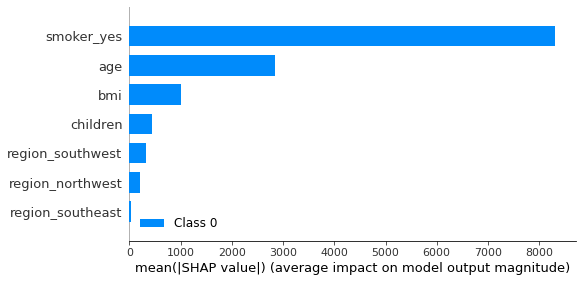

In [82]:
# Feature importance
import shap

# If there are too many samples in X_train, it will take a lot of computational resources to get the explainer. 
# We can sample data to use lesser data.
# explainer = shap.DeepExplainer(model,  shap.sample(X_train,100))
explainer = shap.DeepExplainer(model,  X_train)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
#Ignore warnings for now

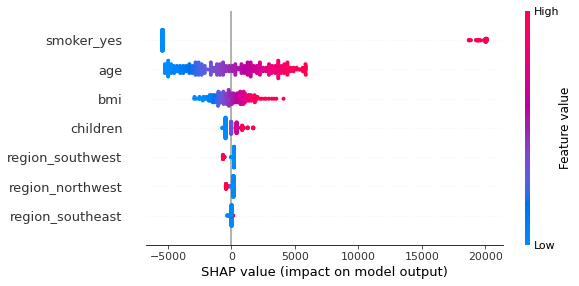

In [83]:
shap.summary_plot(shap_values[0], X_test, feature_names=X.columns)

In [84]:
# Deployment
# Predict charges for new customer : Name- Diogo dos Santos
data = {'age' : 50,
        'bmi' : 20,
        'children' : 0,
        'smoker_yes' : 0,
        'region_northwest':1,
        'region_southeast':0,
        'region_southwest': 0}
index = [1]
diogo_df = pd.DataFrame(data,index)
diogo_df

,age,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest
1,50,20,0,0,1,0,0


In [86]:
#Modelo Machine Learning
prediction_diogo = best_model.predict(diogo_df)
print("Medical Insurance cost for Diogo is : ",prediction_diogo)

Medical Insurance cost for Diogo is :  [17437.117]
